In [2]:
# import library and url to load LatLong from
import pandas as pd
import requests
import time

In [3]:
# Downloading PRECTOT,QV2M,PS,TS,T2MDEW,T2M,WS50M,WS10M,T2MWET,T2M_RANGE,RH2M,KT,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_LW_DWN

# Actual URL --> https://power.larc.nasa.gov/cgi-bin/v1/DataAccess.py?&request=execute&identifier=SinglePoint&parameters=PRECTOT,QV2M,PS,TS,T2MDEW,T2M,WS50M,WS10M,T2MWET,T2M_RANGE,RH2M,KT,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_LW_DWN&startDate=19810101&endDate=20201231&userCommunity=SSE&tempAverage=DAILY&outputList=CSV&lat=41.1560&lon=-100.2092

#base url to get the data from
base_url = 'https://power.larc.nasa.gov/cgi-bin/v1/DataAccess.py?&request=execute&identifier=SinglePoint&parameters=PRECTOT,QV2M,PS,TS,T2MDEW,T2M,WS50M,WS10M,T2MWET,T2M_RANGE,RH2M,KT,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_LW_DWN&startDate=19810101&endDate=20201231&userCommunity=SSE&tempAverage=DAILY&outputList=CSV&lat='

#Import Lat Long from another CSV. This information will be used to request data from NASA app
LatLong = pd.read_csv('/home/rob-rog/PycharmProjects/Colab_Notebooks/Unit 2 - Linear Models/Sprint_4_Build_Precipitation_Prediction/LatLong/average-latitude-longitude-countries.csv')
LatLong.head()

#make get request and make json file
r = requests.get(base_url+f"{LatLong['Latitude'][0]}&lon={LatLong['Longitude'][0]}")
json = r.json()

#instantiate the DataFrame
df = pd.DataFrame()

# merge function
def merge(df1, df2):
    merged = df1.merge(df2, on='date')
    return merged

#define function to convert json data to DataFrame
def to_dataframe(json_data):
    list_features = r.json()['features']
    len(list_features)

    dict_features = dict(list_features[0])
    type(dict_features)

    # dict_features_geo_coordinates = \
    dict_features_geo = dict_features['geometry']
    dict_features_geo_coodinates = dict_features_geo['coordinates']
    lat = dict_features_geo_coodinates[0]
    long = dict_features_geo_coodinates[1]
    elevation = dict_features_geo_coodinates[2]
    # Subsetting the json data to reach to the features
    dict_features_prop = dict_features['properties']
    dict_features_prop_para = dict_features_prop['parameter']
    dict_features_prop_para_prec = dict_features_prop_para['PRECTOT']
    dict_features_prop_para_qv2m = dict_features_prop_para['QV2M']
    dict_features_prop_para_surfp = dict_features_prop_para['PS']
    dict_features_prop_para_ts = dict_features_prop_para['TS']
    dict_features_prop_para_t2mdew = dict_features_prop_para['T2MDEW']
    dict_features_prop_para_t2m = dict_features_prop_para['T2M']
    dict_features_prop_para_ws10m = dict_features_prop_para['WS10M']
    dict_features_prop_para_ws50m = dict_features_prop_para['WS50M']
    dict_features_prop_para_t2mwet = dict_features_prop_para['T2MWET']
    dict_features_prop_para_t2mrange = dict_features_prop_para['T2M_RANGE']
    dict_features_prop_para_rh2m = dict_features_prop_para['RH2M']
    dict_features_prop_para_kt = dict_features_prop_para['KT']
    dict_features_prop_para_clrskysw = dict_features_prop_para['CLRSKY_SFC_SW_DWN']
    dict_features_prop_para_allskysw = dict_features_prop_para['ALLSKY_SFC_SW_DWN']
    dict_features_prop_para_allskylw = dict_features_prop_para['ALLSKY_SFC_LW_DWN']
    # making a dataframe for each feature
    df_prec = pd.DataFrame(list(dict_features_prop_para_prec.items()), columns=['date', 'precipitation'])
    df_qv2m = pd.DataFrame(list(dict_features_prop_para_qv2m.items()), columns=['date', 'specific_humidity'])
    df_ps = pd.DataFrame(list(dict_features_prop_para_surfp.items()), columns=['date', 'surface_pressure'])
    df_ts = pd.DataFrame(list(dict_features_prop_para_ts.items()), columns=['date', 'skin_temperature'])
    df_t2mdew = pd.DataFrame(list(dict_features_prop_para_t2mdew.items()), columns=['date', 'dew_frost'])
    df_t2m = pd.DataFrame(list(dict_features_prop_para_t2m.items()), columns=['date', 'temperature2m'])
    df_ws10m = pd.DataFrame(list(dict_features_prop_para_ws10m.items()), columns=['date', 'windspeed10m'])
    df_ws50m = pd.DataFrame(list(dict_features_prop_para_ws50m.items()), columns=['date', 'windspeed50m'])
    df_t2mwet = pd.DataFrame(list(dict_features_prop_para_t2mwet.items()), columns=['date', 'wet_bulb_temp'])
    df_t2mrange = pd.DataFrame(list(dict_features_prop_para_t2mrange.items()), columns=['date', 'temp_range'])
    df_rh2m = pd.DataFrame(list(dict_features_prop_para_rh2m.items()), columns=['date', 'rel_humidity'])
    df_kt = pd.DataFrame(list(dict_features_prop_para_kt.items()), columns=['date', 'clearness_index'])
    df_clrskysw = pd.DataFrame(list(dict_features_prop_para_clrskysw.items()), columns=['date', 'clear_sky_insolation'])
    df_allskysw = pd.DataFrame(list(dict_features_prop_para_allskysw.items()), columns=['date', 'all_sky_insolation'])
    df_allskylw = pd.DataFrame(list(dict_features_prop_para_allskylw.items()), columns=['date', 'radiative_flux'])

    # merging all dataframe in one
    merge1 = merge(df_prec, df_qv2m)
    merge2 = merge(df_ps, df_ts)
    merge3 = merge(df_t2mdew, df_t2m)
    merge4 = merge(df_ws10m, df_ws50m)
    merge5 = merge(df_t2mwet, df_t2mrange)
    merge6 = merge(df_rh2m, df_kt)
    merge7 = merge(df_clrskysw, df_allskysw)
    merge12 = merge(merge1, merge2)
    merge34 = merge(merge3, merge4)
    merge56 = merge(merge5, merge6)
    merge78 = merge(merge7, df_allskylw)
    merge1234 = merge(merge12, merge34)
    merge5678 = merge(merge56, merge78)
    merge_final = merge(merge1234, merge5678)

    merge_final['lat'] = lat
    merge_final['long'] = long
    merge_final['elevation'] = elevation

    #round to two decimals
    merge_final['lat'] = merge_final['lat'].round(2)
    merge_final['long'] = merge_final['long'].round(2)
    merge_final['elevation'] = merge_final['elevation'].round(2)
    merge_final['country'] = country
    merge_final['country_code'] = country_code

    # date to datetime object
    merge_final['date'] = pd.to_datetime(merge_final['date'], infer_datetime_format=True)

    #rearrange
    merge_final = merge_final[['date','country', 'country_code', 'lat', 'long', 'elevation', 'specific_humidity', 'surface_pressure', 'skin_temperature', 'dew_frost', 'temperature2m', 'windspeed10m', 'windspeed50m', 'wet_bulb_temp', 'temp_range', 'rel_humidity', 'clearness_index', 'clear_sky_insolation', 'all_sky_insolation', 'radiative_flux', 'precipitation']]
    return merge_final

print('Scraping Data from NASA Servers. Initial DF shape', df.shape)
start_time = time.time()

# loop to iterate the lat long information and get request from NASA app
for i in range(0,240):
    r = requests.get(base_url+f"{LatLong['Latitude'][i]}&lon={LatLong['Longitude'][i]}")
    country = LatLong['Country'][i]
    country_code = LatLong['ISO 3166 Country Code'][i]
    print('Requesting Surface Pressure data for ',country,' from NASA servers')
    json = r.json()
    df1 = to_dataframe(json)
    df = pd.concat([df, df1])
    now = time.time()
    print('Success DataFrame shape is ', df.shape, 'Time Elapsed ',(now - start_time) )

#export to CSV file
df.to_csv('global_nasa_weather_data.csv')
df

Scraping Data from NASA Servers. Initial DF shape (0, 0)
Requesting Surface Pressure data for  Andorra  from NASA servers
Success DataFrame shape is  (14610, 21) Time Elapsed  13.300741910934448
Requesting Surface Pressure data for  United Arab Emirates  from NASA servers
Success DataFrame shape is  (29220, 21) Time Elapsed  30.19693350791931
Requesting Surface Pressure data for  Afghanistan  from NASA servers
Success DataFrame shape is  (43830, 21) Time Elapsed  39.3743200302124
Requesting Surface Pressure data for  Antigua and Barbuda  from NASA servers
Success DataFrame shape is  (58440, 21) Time Elapsed  53.788885831832886
Requesting Surface Pressure data for  Anguilla  from NASA servers
Success DataFrame shape is  (73050, 21) Time Elapsed  70.27364420890808
Requesting Surface Pressure data for  Albania  from NASA servers
Success DataFrame shape is  (87660, 21) Time Elapsed  81.89961075782776
Requesting Surface Pressure data for  Armenia  from NASA servers
Success DataFrame shape i

,date,country,country_code,lat,long,elevation,specific_humidity,surface_pressure,skin_temperature,dew_frost,...,windspeed10m,windspeed50m,wet_bulb_temp,temp_range,rel_humidity,clearness_index,clear_sky_insolation,all_sky_insolation,radiative_flux,precipitation
0,1981-01-01,Andorra,AD,1.5,42.5,1216.58,3.78,89.39,-1.60,-1.92,...,4.93,6.96,-1.91,6.50,98.04,-999.00,-999.0,-999.00,-999.00,4.51
1,1981-01-02,Andorra,AD,1.5,42.5,1216.58,3.34,89.28,-2.87,-3.47,...,4.28,5.81,-3.46,4.30,95.14,-999.00,-999.0,-999.00,-999.00,1.62
2,1981-01-03,Andorra,AD,1.5,42.5,1216.58,3.75,88.74,-2.06,-2.22,...,3.99,5.97,-2.21,5.73,99.22,-999.00,-999.0,-999.00,-999.00,0.32
3,1981-01-04,Andorra,AD,1.5,42.5,1216.58,4.88,88.18,1.89,1.48,...,6.77,9.83,1.48,4.46,97.88,-999.00,-999.0,-999.00,-999.00,3.75
4,1981-01-05,Andorra,AD,1.5,42.5,1216.58,3.13,88.68,-3.23,-4.37,...,5.18,7.13,-4.36,4.97,92.19,-999.00,-999.0,-999.00,-999.00,1.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,2020-12-27,Zimbabwe,ZW,30.0,-20.0,1204.44,15.01,87.90,24.84,18.39,...,2.50,4.03,18.25,12.08,71.19,0.60,-999.0,7.01,9.58,5.90
14606,2020-12-28,Zimbabwe,ZW,30.0,-20.0,1204.44,15.82,87.93,24.22,19.21,...,3.04,4.93,19.14,9.44,75.20,0.49,-999.0,5.67,9.44,13.73
14607,2020-12-29,Zimbabwe,ZW,30.0,-20.0,1204.44,14.98,87.92,24.48,18.35,...,3.25,5.17,18.25,10.56,71.46,0.69,-999.0,8.03,8.95,0.20
14608,2020-12-30,Zimbabwe,ZW,30.0,-20.0,1204.44,14.57,87.81,22.78,17.87,...,3.69,5.44,17.76,10.83,76.16,0.24,-999.0,2.83,9.51,4.80


## Choosing the target

The target is precipitation

## Is your problem regression or classification?

Regression problem

## How is your target distributed?

The target is a quantitative data and by looking at the distribution plot we can see the data is skewed towards the right

## Regression: Is the target right-skewed? If so, you may want to log transform the target.

There are only 376 rows out of approximately 3.5 Million observations that is making the data to be skewed to the right.

## Choose your evaluation metric(s). Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?

R squared

## Choose which observations you will use to train, validate, and test your model.

A train test split will be required

## Begin to choose which features, if any, to exclude. Would some features "leak" future information?

Could not find any feature that may leak future information.




/home/rob-rog/deps/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='precipitation', ylabel='Density'>

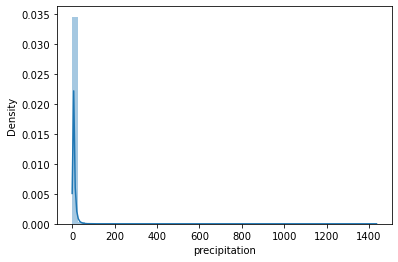

In [4]:
import seaborn as sns

sns.distplot(df['precipitation'])

In [5]:
condition = df['precipitation'] > 100
df[condition]

,date,country,country_code,lat,long,elevation,specific_humidity,surface_pressure,skin_temperature,dew_frost,...,windspeed10m,windspeed50m,wet_bulb_temp,temp_range,rel_humidity,clearness_index,clear_sky_insolation,all_sky_insolation,radiative_flux,precipitation
5360,1995-09-05,Antigua and Barbuda,AG,-61.80,17.05,1.86,20.92,99.59,28.40,25.73,...,17.32,20.32,25.74,0.76,85.46,0.02,7.51,0.23,10.24,142.69
6866,1999-10-20,Antigua and Barbuda,AG,-61.80,17.05,1.86,19.67,100.35,27.98,24.84,...,15.34,18.07,24.84,0.45,86.23,0.02,6.43,0.18,10.11,141.39
8348,2003-11-10,Antigua and Barbuda,AG,-61.80,17.05,1.86,18.83,101.20,28.30,24.25,...,7.31,8.17,24.25,0.92,84.69,0.21,5.86,1.76,10.12,103.07
14316,2020-03-13,Angola,AO,18.50,-12.50,1403.44,15.99,85.92,20.73,18.91,...,2.02,3.07,18.94,5.46,89.62,0.08,-999.00,0.80,9.58,261.51
14317,2020-03-14,Angola,AO,18.50,-12.50,1403.44,15.81,85.97,20.55,18.74,...,2.21,3.49,18.77,6.18,90.32,0.19,-999.00,2.03,9.59,138.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13857,2018-12-10,Samoa,WS,-172.33,-13.58,56.56,18.97,100.20,28.62,24.26,...,8.05,9.22,24.21,2.33,81.50,0.29,-999.00,3.25,10.91,123.55
12802,2016-01-20,Mayotte,YT,45.17,-12.83,3.08,20.25,100.83,29.44,25.40,...,5.84,6.38,25.40,0.95,85.00,0.25,-999.00,2.76,11.05,135.75
13576,2018-03-04,Mayotte,YT,45.17,-12.83,3.08,19.91,100.53,29.80,25.09,...,5.73,6.23,25.07,0.99,85.59,0.21,-999.00,2.22,11.14,109.01
8391,2003-12-23,South Africa,ZA,24.00,-29.00,1153.38,12.06,88.46,23.31,13.79,...,5.30,7.22,13.80,11.28,61.24,0.62,8.98,7.49,9.09,146.66
